![GMIT](GMIT-logo.png)

#  <div align="center"> Fundamentals of Data Analysis <div>
## <div align="center"> Project_2020 <div>

## Author: Shane Rylands

### G00387904@gmit.ie

***

## <u>Instructions<u>

In this project you must perform and explain simple linear regression using Python on the `powerproduction` dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

Your submission must be in the form of a git repository containing, at a minimum, the following items:

1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to other types of regression on this data set. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.
***

### To Do

add a condition to the predict that if input is over under a value then reject

look into bayesian criteria  https://www.youtube.com/watch?v=QptI-vDle8Y

look into bias https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

Bayes information criteria 

Use scikit learn to remove outliers. did nt work 

could add images to notebook 
 add issues in readme 
 
 didnt get kfold to work 

In [18]:
# Import necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Plots will print to interface 
%matplotlib inline
# Set the plot size 
plt.rcParams['figure.figsize'] = (15, 8)

# Set the style of plotting matplotlib will use
plt.style.use('ggplot')

## <u>Regression<u>

Regression analysis is a type of supervised, machine learning. With supervised, machine learning we use a sample dataset containing inputs and corresponding outputs to make predictions. With this sample dataset we establish a relationship between the inputs and associated outputs, which is then used to estimate or, make predictions of, outcomes based upon similar inputs. With regression analysis there is a target, the value we hope to predict, and what we used to predict our target variable, the predictor. The target is genereally referred to as the dependent as it's value is dependent upon the input variables and the values we use to predict our target variable is known as the independent as it is not influenced by the dependent. The independent is often denoted as `X` and the independent as `y`.

Under the umbrella of regression analysis there is Simple Linear, Multiple Linear and Polynomial regression, each of which has it's own use cases. Simple linear regression is when we are able to draw a straight line through our data. Multiple linear regression is when the dataset contains multivariant data. Polynomial regression is when we draw a curved line through our dataset. [1][2][3][4][5]

### <u> Linear Regression <u>
    
Linear regression can be applied when a linear relationship exists between the dependents and independents or, in others words, that the value of `y` can be denoted as $y = m * x + c$; where $m$ is the slope of the line and $c$ is the $y$ intercept. 

When plotted $y = m * x + c$ draws a straight line that bisects the `X` and `Y` axes. With this line we can determine values of $y$ for given values of $x$. A linear regression model uses this to approximate unknown values of $y$.

When dealing with a dataset that contains multiple points, we can plot countless lines that bisect the `X` and `Y` axes, but the question is, which line best fits the dataset? Which line is not too close or too far from the datapoints? Below we see an example of a simple dataset with a number of lines bisecting the $x$ and $y$ axis. [4][5][6][7]

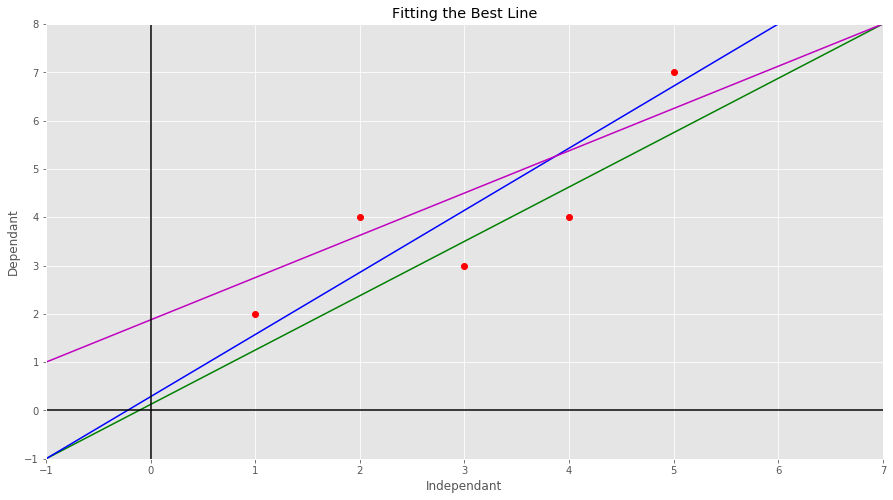

In [13]:
x = np.arange(1,6)
y = [2,4,3,4,7]
plt.plot([-1,7],[-1,8],'g', label = 'Best Fit Line')
plt.plot([-1,6],[-1,8],'b', label = 'Best Fit Line')
plt.plot([-1,7],[1,8],'m', label = 'Best Fit Line')
plt.plot([-1, 10], [0, 0], 'k-')
plt.plot([0, 0], [-1, 10], 'k-')
plt.plot(x, y, 'ro');
plt.xlim([-1, 7])
plt.ylim([-1, 8])
plt.xlabel('Independant')
plt.ylabel('Dependant')
plt.title('Fitting the Best Line')
plt.show()

### <u> Least Squared <u>
    
Determining the line that best suits our datset will give us the most accurate predictions for $y$ and is referred to as <b>the line of best fit</b>. In order to establish the line of best fit we use the leasted squared method. The least squared method works by making the total of the square of the errors as small as possible. Errors refers to the distance between the datapoints and the line, which is illustrated below. 

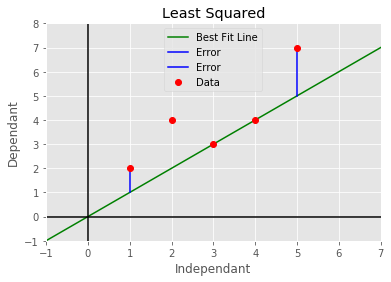

In [16]:
x = np.arange(1,6)
y = [2,4,3,4,7]
plt.plot([-1,7],[-1,7],'g', label = 'Best Fit Line')
plt.plot([1, 1], [1, 2], 'b-', label = 'Error')
plt.plot([5, 5], [5, 7], 'b-', label = 'Error')
plt.plot([-1, 10], [0, 0], 'k-')
plt.plot([0, 0], [-1, 10], 'k-')
plt.plot(x, y, 'ro', label = 'Data');
plt.xlim([-1, 7])
plt.ylim([-1, 8])
plt.xlabel('Independant')
plt.ylabel('Dependant')
plt.title('Least Squared')
plt.legend()
plt.show()

When the straight line above minimizes the sum of squared errors we take it as our best fit line. So, when we square each of those errors and add them all up, the total is as small as possible. 

Luckily, Numpy includes a method called `polyfit` that allows us to easily fit a line to a dataset. Let's use polyfit to find our best fit line and investigate whether our dataset is suitable for linear regression.

[5][8][9][10][11][12][13][14][15]

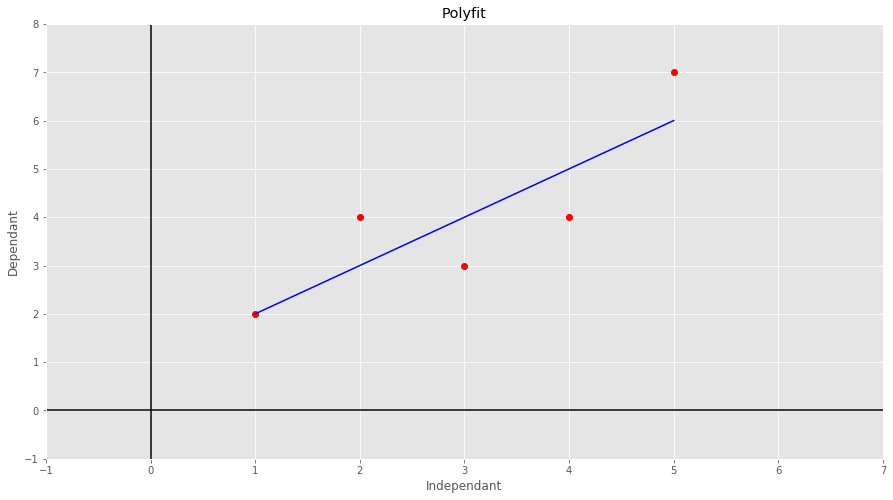

In [14]:
x = np.arange(1,6)
y = [2,4,3,4,7]

# Use polyfit to determine our best fit line. The coefficients of our line are m & c 
np.polyfit(x, y,1)
m,c = np.polyfit(x, y ,1)

plt.plot([-1, 10], [0, 0], 'k-')
plt.plot([0, 0], [-1, 10], 'k-')
plt.plot(x, y, 'ro');
plt.plot(x,m * x + c, 'b-', label = 'Best Fit Line')
plt.xlim([-1, 7])
plt.ylim([-1, 8])
plt.xlabel('Independant')
plt.ylabel('Dependant')
plt.title('Polyfit')
plt.show()

## <u>Investigate The Dataset<u>
    
Now that we understand linear regression a little better, let us apply it to our dataset `powerproduction` and see if we can use it to make some predictions.
Before that, we need to understand the data we are working. We will begin by investigating our dataset.

In [3]:
# use pandas to read in the dataset
df = pd.read_csv('powerproduction.csv')

# lets get some infomation about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
speed    500 non-null float64
power    500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [5]:
# lets get a summary of the data contained within the dataset
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [6]:
# Check for issues in the file by comparing the head and tail
def ends(df, x=5):
    return df.head(x).append(df.tail(x))
ends(df)

# https://stackoverflow.com/questions/42504984/python-pandas-select-both-head-and-tail

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [7]:
# Lets take a look at the middle of the dataset
df.iloc[245:255,:]

,speed,power
245,12.387,37.159
246,12.412,52.952
247,12.462,44.745
248,12.487,44.735
249,12.538,44.801
250,12.563,42.336
251,12.588,54.079
252,12.613,51.471
253,12.663,44.880
254,12.713,51.149


After investigating our dataset we were able to determine that the file contains 2 columns; `Speed` & `Power` each with 500 rows of float values. `Speed`, presumably referring to wind speed and most likely measured in knots, ranges from 0-25 and `Power`, most likely the power output for the corresponding wind speed, ranges from 0-113.5.

Looking at the head and tail, we can see that the dataset also contains a number of 0 power values, meaning there a certain wind speeds that do not appear to yield a power output. Lets continue with our investigation by plotting the datset. As we are dealing continous, numerical, bivariant data an appropriate plot to use would be a scatterplot. [16][17][18]

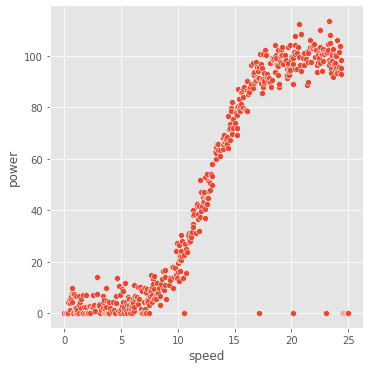

In [15]:
# plot the data
sns.relplot(x="speed", y="power", data=df);

There are 0 power values throughout the dataset. Those at the low & high of the wind speed range can be attributed to the wind being too light to move the turbines and too strong to operates the turbine safely. 


In [21]:
# Lets separate out the rows that have no power output
noPowerProduction = df[df['power']==0]
noPowerProduction.shape

# https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/#:~:text=One%20way%20to%20filter%20by,based%20on%20year's%20value%202002.

(49, 2)

In [22]:
noSpeed = noPowerProduction['speed']
noPower = noPowerProduction['power']
X = df['speed']
y = df['power']

Text(0.5, 1.0, 'Outliers')

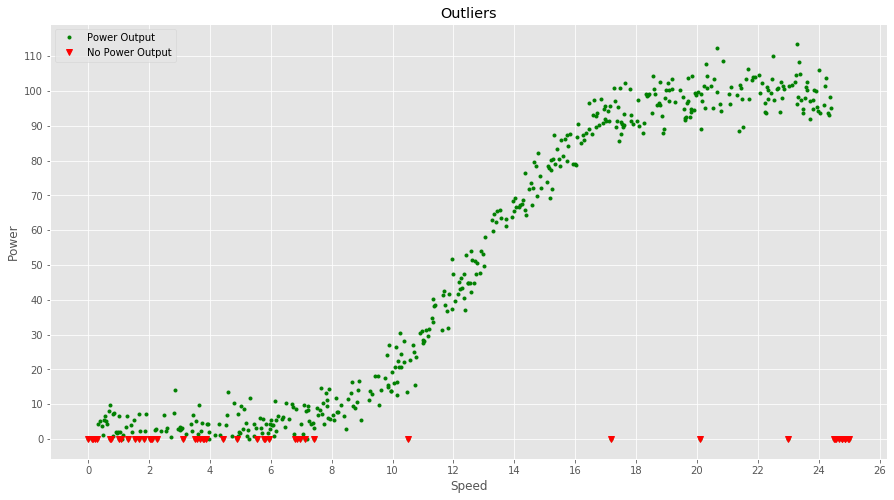

In [24]:
# https://stackoverflow.com/questions/50120633/plotting-line-graph-with-highlighted-data-points/50120670
# https://www.kite.com/python/answers/how-to-change-the-frequency-of-ticks-in-a-matplotlib-figure-in-python
# https://realpython.com/ggplot-python/
# https://matplotlib.org/3.1.1/gallery/style_sheets/ggplot.html
plt.plot(X, y, 'g.', label = 'Power Output')
plt.plot(noSpeed, noPower, 'rv', label = 'No Power Output')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.xticks(np.arange(0,28,2))
plt.yticks(np.arange(0,120,10))
plt.legend()
plt.title('Outliers')

## Preprocessing


These 0 power datapoints differ from the rest of the observations in the dataset and are known as Outliers. Outliers cause variance in the dataset that will significant impact the accuracy of our regression model. Before proceeding they will need to be removed, this process is known as preprocessing.[19][20][21]

In [25]:
# Lets remove all the power values from our dataset. We will create a new preporcessed dataset under a new 
# name and keep the originally in case we need to refer back to it.
df_mod = df[df['power'] > 0]
df_mod.shape

(451, 2)

In [89]:
ends(df_mod)

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223
489,24.399,95.117


In [34]:
# fix the index
df_mod.set_index(np.arange(0,len(df_mod)))

,speed,power
0,0.325,4.331
1,0.400,5.186
2,0.450,3.826
3,0.501,1.048
4,0.526,5.553
...,...,...
446,24.249,103.700
447,24.299,93.694
448,24.349,93.078
449,24.374,98.223


In [96]:
X_mod = df_mod['speed']
y_mod = df_mod['power']

***

## <u>Linear Regression<u>
   
Now that we cleaned up our dataset lets us try apply linear regression to it and make some prepredictions.

In [68]:
# define our dependant and independant variables 
X = df_mod['speed']
y = df_mod['power']
print(X.shape, y.shape)

(451,) (451,)


### Predicting 

use KFold

In [60]:
reg.predict(speed_test)

array([ 10.3996976 , 101.7432231 ,  96.39919729,  -4.54027644,
        13.92355113,   9.79297351,  41.61443868,  25.096982  ,
        67.1259733 ,  10.27835278, -10.12699188,  60.32095589,
        12.94793879,  78.420749  ,  -6.11775908,  43.19677512,
        58.01540434,  62.87405087,  70.64497304,  86.80324905,
        84.37149889,  57.53002507,  60.07826625,  41.85712832,
        38.58081822,  48.66214574,  60.44230071,  98.21936957,
        39.79426641,  67.00462849,  92.63265413,  47.69138719,
        46.83711967,  25.82505091,  71.13035231,  82.18729216,
        69.43152485,  -5.26834535,  64.57287832,  79.27016273,
        62.63136123,  34.93561988,  98.82609366,  42.95408548,
        60.92767998,  66.02901615,  77.32864563,  73.0767232 ,
         2.98795609,  83.40074035,  51.21038692,  47.81273201,
         3.23064573,  24.73294755,  40.52233532,  71.86327501,
        55.94768863,  74.16882656,  84.12880926, 107.32993853,
        70.4022834 ,  63.35943014, 105.50491247,  55.21

In [69]:
# we need to reshape our input values so it fits into our regression model
X = X.values.reshape(-1, 1)
# https://stackoverflow.com/questions/49514684/python-sklearn-fit-array-error/49517796
# https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.Series.reshape.html
# https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

In [70]:
import sklearn.model_selection as mod
X_train, X_test, y_train, y_test  = mod.train_test_split(X, y, test_size=0.33)
print(X_train.shape, y_train.shape)

(302, 1) (302,)


In [71]:
# https://scikit-learn.org/stable/modules/linear_model.html
import sklearn.linear_model as lin
reg = lin.LinearRegression()

In [72]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
reg.predict(X_test)

array([ 26.23478801,  15.91460748,  93.52213918,  90.98022279,
        59.45481086,   1.4991172 ,  28.2174828 ,  68.22159805,
       -14.47541513, -17.44098425,  72.17569021,  96.77579215,
       115.00980572,  68.08038048,  36.97862128,   7.43590414,
        41.2207973 ,  36.41375098,  92.95726887,  77.97125958,
        23.8340892 ,  65.10916265, -15.32272059,  20.29800107,
        90.2741349 ,  14.07877897,  59.17237571,  15.49095474,
       -11.36297973,  47.01636667,  79.81273679,  64.8267275 ,
        78.82421375,  56.7716769 ,  -1.47210062,  54.93019969,
        13.9375614 ,  45.88662605,  48.14610729,  29.34722341,
        65.39159781,  15.7733899 ,  97.19944488, -17.58220183,
       107.37840785,   7.01225141,  96.06970427,  58.32507025,
        91.12144036,  98.61162066,  17.89730226,  29.91209372,
         3.75859843, -18.85880872,  38.53201463,  21.71582555,
        84.47856553,  36.83740371, 114.30371783,  -0.19549373,
         9.13051507, 110.90884727, -14.19297997,  66.38

In [74]:
print(reg.coef_)
print(reg.intercept_)

[5.64870309]
-20.694637225489352


### Evaluate

In [63]:
# lets evaluate our dataset by looking at our predictions and comparing them to the actualy values 
print(yhat.reshape(-1,1)[1:10])

[[ 29.55968706]
 [ 37.87109138]
 [ 99.51066542]
 [105.38764739]
 [ 44.03447598]
 [  8.34298023]
 [ 43.74807335]
 [ 20.38334679]
 [  0.31797853]]


In [64]:
print( y_test.values.reshape(-1,1)[1:10])

[[10.76 ]
 [20.636]
 [99.103]
 [99.46 ]
 [38.184]
 [ 8.623]
 [40.224]
 [ 9.406]
 [ 4.595]]


In [60]:
# lets count the amount of matches between our prediction and the test datset
yhat = reg.predict(X_test)
(yhat == y_test).sum()

0

Comparing the first few rows of `yhat` and `y_test` we can see some values are similar, but our prediction doesnt appear to be a very good match. We can use scikit learn to score our regression model. [22]

In [17]:
# lets score our regression model
import sklearn.metrics as met
score = met.r2_score
score(y_test,yhat)

NameError: name 'y_test' is not defined

Lets try to figure out why our predictions aren't good by looking at the line we used to make them. We can do this with Numpy's polyfit method.

In [77]:
# we need to re-define our dependant and independant variables 
X = df_mod['speed']
y = df_mod['power']

# Lets use polyfit to estimate our coefficients for the best line, which shall m & c 
m,c = np.polyfit(X, y ,1)
m,c

(5.6188278377785394, -19.837685452108364)

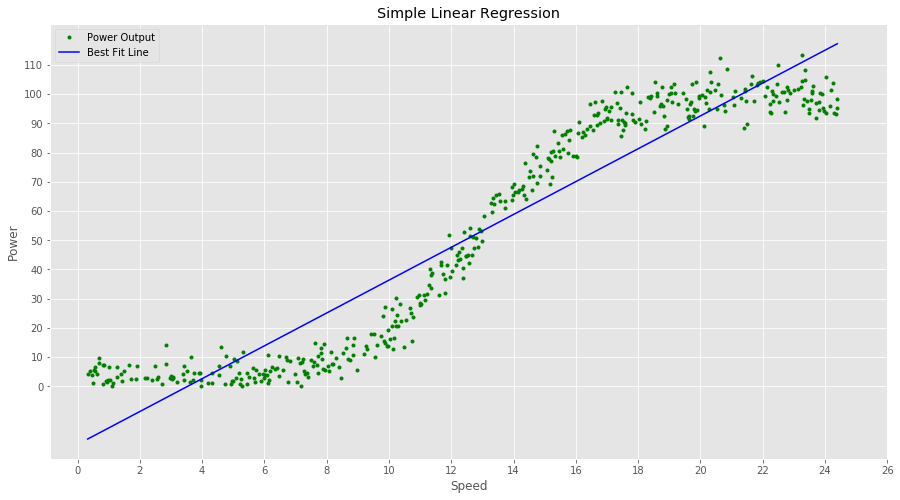

In [78]:
# lets fit a line to our dataset
plt.plot(X, y, 'g.', label = 'Power Output')
plt.plot(X,m * X + c, 'b-', label = 'Best Fit Line')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.xticks(np.arange(0,28,2))
plt.yticks(np.arange(0,120,10))
plt.title('Simple Linear Regression')
plt.legend()

# https://stackoverflow.com/questions/50120633/plotting-line-graph-with-highlighted-data-points/50120670
# https://www.kite.com/python/answers/how-to-change-the-frequency-of-ticks-in-a-matplotlib-figure-in-python
# https://realpython.com/ggplot-python/
# https://matplotlib.org/3.1.1/gallery/style_sheets/ggplot.html

We can clearly that the straight line we used for our regression model is not a good fit for this dataset. Our model is a poor representation of the relationship between the input and the dependant values, which has resulted in our poor predictions. This scenario is known as High Bias and is when our regression line is underfitting our dataset.  

In contrast, we can have High Variance. This is when our model is overfitting the dataset and prefectly matches it. While this may seem like a good outcome, it is also a cause for concern, as such models often fail to generalize to future datasets. So while your model works well for your existing data, you don’t know how well it’ll perform on other examples.

The trick with regression analysis is to find the balance between the two. We can use polyfit to help us do that.
[4][23]
***

## <u>Polynomial Regression<u>

Polynomial regression is another form of regression analysis in which the relationship between the independent `X` and the dependent `y` is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of `X` and the corresponding conditional mean of `y`, denoted `E(y |x)`. Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function E(y | x) is linear in the unknown parameters that are estimated from the data. For this reason, polynomial regression is considered to be a special case of multiple linear regression.

Linear regression and polynomial regression are essentially the same thing. Polynomial regression is multiple iterations of simple linear regression, a simple linear regression is actually a first order polynomial. The coefficients are all linear  

[24][25][26][27][28][29][30]

In [105]:
X = df_mod['speed']
y = df_mod['power']

# lets create a number of lines
p1 = np.polyfit(X, y,1)
#quadratic
p2 = np.polyfit(X, y,2)
#cubic
p3 = np.polyfit(X, y,3)

p100 = np.polyfit(X, y,100)


# https://www.youtube.com/watch?v=ro5ftxuD6is&t=744s

/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


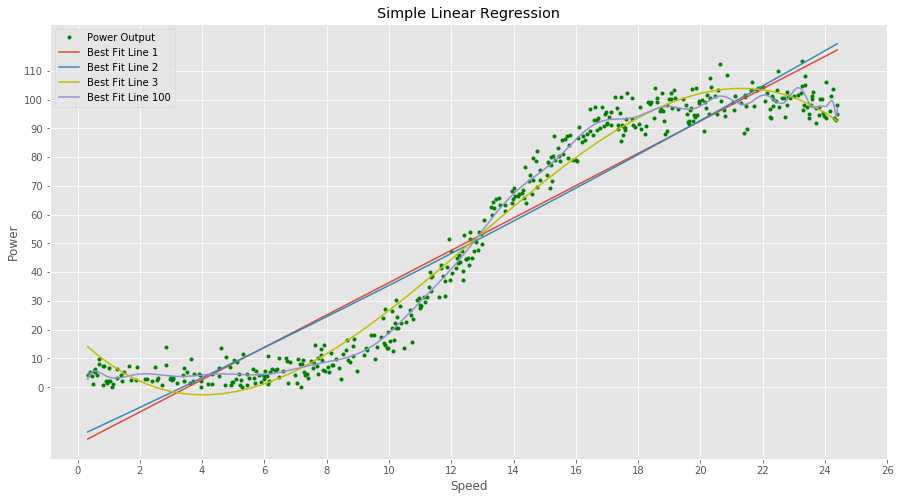

In [106]:
x = plt.plot(X, y, 'g.', label = 'Power Output')
# we can use polyval to help us plot our lines 
plt.plot(X, np.polyval(p1, X), label = 'Best Fit Line 1')
plt.plot(X, np.polyval(p2, X), label = 'Best Fit Line 2')
plt.plot(X, np.polyval(p3, X), 'y', label = 'Best Fit Line 3')
plt.plot(X, np.polyval(p100, X),  label = 'Best Fit Line 100')

plt.xlabel('Speed')
plt.ylabel('Power')
plt.xticks(np.arange(0,28,2))
plt.yticks(np.arange(0,120,10))
plt.title('Simple Linear Regression')
plt.legend()

# https://numpy.org/doc/stable/reference/generated/numpy.polyval.html

In [107]:
# we need to reshape our input values so it fits into our regression model
X = X.values.reshape(-1, 1)

In [108]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)
# https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape
# https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [109]:
X_train, X_test, y_train, y_test  = mod.train_test_split(X, y, test_size=0.33)

In [110]:
polyreg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [111]:
polyreg.predict(X_test)

array([ 84.95731337, 101.66506763,  10.54635962, 103.01057219,
         0.23128446,  97.30143287,  11.39611845,   5.92483128,
         7.8050102 , 101.40320806, 101.75109738,  -1.30414268,
       103.57578299, 103.71721894,  99.02806428,  90.31812277,
        -1.49815855,  95.64651486, 102.37436776,  42.94934895,
       102.90407729,  96.93445678,  83.27663135,  80.38392133,
        33.67803699,  18.7672584 ,  46.64041316,  26.56352955,
        85.50400845,  82.7081851 , 104.05522226,   8.28246478,
         0.38847091,  -1.18299544,  54.07107006,  99.82768703,
        80.77673719,   0.26412863,  91.75237471,  -0.14232817,
        27.40293327,  91.59679001,   3.14359876,  -1.74234016,
        16.71985988,  85.86531975, 102.89549214,  -1.87103767,
         0.55003389,  50.59129964, 101.58854682,   9.17838037,
        -0.60826444,   1.1495159 , 101.27146801,   8.17471086,
        97.53287292,   1.60955946, 103.94523768,  35.45466447,
        85.68498193,  95.33451054,  -1.79841294,  58.22

In [112]:
(polyreg.predict(X_test) == y_test).sum()

0

In [113]:
score(y_test, polyreg.predict(X_test))

0.9747981618852825

In [114]:
polyreg.predict(X_test)[1:10]

array([101.66506763,  10.54635962, 103.01057219,   0.23128446,
        97.30143287,  11.39611845,   5.92483128,   7.8050102 ,
       101.40320806])

In [115]:
y_test.values[1:10]

array([ 97.173,   7.271,  96.65 ,   6.184, 100.485,   9.746,   4.187,
         1.208, 102.544])

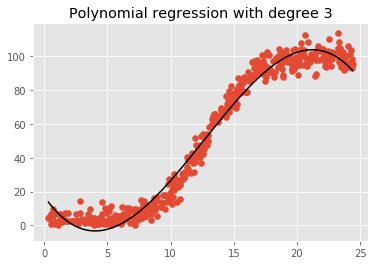

In [165]:
plt.figure()
plt.scatter(X_mod,y_mod)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

### <u>Neural Network<u>
    
I wanted to compare the accuracy of my linear and polynomial regressions against another type of machine learning 

In [29]:
import sklearn.neural_network as sknn


# Train the neural network.
regr = sknn.MLPRegressor(max_iter=10000).fit(Speed, Power)

# Show the predictions.
np.array([Power, regr.predict(Speed)]).T

array([[0.00000000e+00, 2.49033589e+00],
       [0.00000000e+00, 2.52877469e+00],
       [0.00000000e+00, 2.53646244e+00],
       [0.00000000e+00, 2.55952572e+00],
       [0.00000000e+00, 2.57490124e+00],
       [4.33100000e+00, 2.59027675e+00],
       [5.18600000e+00, 2.61334003e+00],
       [3.82600000e+00, 2.62871555e+00],
       [1.04800000e+00, 2.64439857e+00],
       [5.55300000e+00, 2.65208633e+00],
       [6.49800000e+00, 2.65977409e+00],
       [5.24100000e+00, 2.66746185e+00],
       [4.22000000e+00, 2.68283737e+00],
       [7.97400000e+00, 2.69821288e+00],
       [9.74600000e+00, 2.70590064e+00],
       [0.00000000e+00, 2.71358840e+00],
       [0.00000000e+00, 2.72127616e+00],
       [7.27100000e+00, 2.73665168e+00],
       [7.95000000e-01, 2.74433944e+00],
       [7.35000000e+00, 2.75202719e+00],
       [1.99600000e+00, 2.77509047e+00],
       [1.60900000e+00, 2.78277823e+00],
       [2.06400000e+00, 2.79046599e+00],
       [6.51100000e+00, 2.79815375e+00],
       [0.000000

In [30]:
regr.score(Speed, Power)

0.8625698123422274

## <u>References<u>
    
where i have adapt code i have refernced it directly in the cell

[1] https://en.wikipedia.org/wiki/Machine_learning

[2] https://scikit-learn.org/stable/tutorial/basic/tutorial.html

[3] https://en.wikipedia.org/wiki/Supervised_learning

[4] https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

[5] https://www.youtube.com/watch?v=NUXdtN1W1FE

[6] https://en.wikipedia.org/wiki/Simple_linear_regression

[7] https://www.youtube.com/watch?v=E5RjzSK0fvY

[8] https://en.wikipedia.org/wiki/Line_fitting

[9] https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

[10] https://www.youtube.com/watch?v=nk2CQITm_eo&t=461s

[11] https://www.mathsisfun.com/data/least-squares-regression.html

[12] https://www.investopedia.com/terms/l/least-squares-method.asp#:~:text=The%20least%20squares%20method%20is%20a%20statistical%20procedure%20to%20find,the%20behavior%20of%20dependent%20variables

[13] https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions

[14] https://blog.finxter.com/np-polyfit/

[15] https://www.youtube.com/watch?v=aq8VU5KLmkY&list=RDCMUC6AVa0vSrCpuskzGDDKz_EQ&start_radio=1&t=0 

[16] https://www.youtube.com/watch?v=zPG4NjIkCjc

[17] https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots

[18] https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

[19] https://en.wikipedia.org/wiki/Outlier

[20] https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

[21] https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

[22] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2_score#sklearn.metrics.r2_score

[23] https://www.kdnuggets.com/2016/12/4-reasons-machine-learning-model-wrong.html

[24] https://en.wikipedia.org/wiki/Polynomial_regression

[25] https://www.youtube.com/watch?v=QptI-vDle8Y

[26] https://nagordon.github.io/mechpy/Curve_fitting_and_Optimization_with_python.html

[27] https://blog.finxter.com/np-polyfit/

[28] https://pythonbasics.org/polynomial-regression-in-python/

[29] https://www.youtube.com/watch?v=ro5ftxuD6is&t=744s

[30] https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2

## <u>Rough Work<u>
    
To demonstrate my work, I have included some methods i trid that didnt work. I tried to use sklearn to perform preprocessing which didnt work. I also attempt logistical regression, which was unsuccessful.

In [63]:
yhat = pd.Series(reg.predict(X_test))

In [64]:
yhat.describe()

count    165.000000
mean      49.416396
std       33.190904
min      -12.801432
25%       19.874301
50%       51.210387
75%       75.988999
max      107.329939
dtype: float64

In [70]:
# identify outliers in the training dataset
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat_lof = lof.fit_predict(X_train)
yhat_lof = pd.Series(yhat_lof)

/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [71]:
yhat_lof.describe()

count    301.000000
mean       0.800664
std        0.600111
min       -1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

In [72]:
# select all rows that are not outliers
mask = yhat_lof != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [73]:
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
reg.fit(X_train, y_train)
# evaluate the model
yhat = reg.predict(X_test)
# evaluate predictions
#mae = mean_absolute_error(y_test, yhat)
#print('MAE: %.3f' % mae)

(271, 1) (271,)


### Logistic Regression

In [82]:
# https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
#cant use logistic because it is or binary values 
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [84]:
#logisticRegr.fit(speed_train, power_train)

In [ ]:
import sklearn. neighbors as nei

In [ ]:
plt.plot(df["power"], df["speed"],'k.' )
